# **Market Segmentation Analysis for indian-ev-data dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Collecting and Exploring the Data
df = pd.read_csv('/content/indian-ev-data.csv')

In [3]:
# Display first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   id                  Model      Manufacturer Vehicle Type  \
0   1          Aura 300 Plus      Ather Energy      Scooter   
1   2      Pure EV Epluto 7G           Pure EV      Scooter   
2   3  Bajaj Chetak Electric        Bajaj Auto      Scooter   
3   4    Okinawa iPraise Pro  Okinawa Autotech      Scooter   
4   5  Hero Electric Opto EV     Hero Motocorp      Scooter   

   Battery Capacity (kWh)  Range per Charge (km)  Charging Time     Price  \
0                     2.9                    116            4.5  129000.0   
1                     2.7                    120            3.0  109000.0   
2                     4.0                     95            5.0  150000.0   
3                     2.5                    100            3.0   85000.0   
4                     2.2                     75            3.0   75000.0   

   Power (HP or kW)  Top Speed (km/h)  Year of Manufacture  
0               6.0              80.0               2021.0  
1               5.0

In [4]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id                        0
Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
dtype: int64


In [5]:

# Data Preprocessing
# Dropping missing values
df = df.dropna()

In [6]:
# Standardize numeric columns for KMeans clustering
scaler = StandardScaler()
numeric_columns = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [7]:
# Extracting Segments using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Using 4 clusters for segmentation
df['Segment'] = kmeans.fit_predict(df_scaled)

In [8]:


# Ensure only numeric columns are considered in the groupby operation
segmentation_summary = df.groupby('Segment').mean(numeric_only=True)

print("\nSegmentation Summary (Means of Segments):")
print(segmentation_summary)



Segmentation Summary (Means of Segments):
                id  Battery Capacity (kWh)  Range per Charge (km)  \
Segment                                                             
0        12.666667                6.200000             200.000000   
1        25.363636                3.150000             121.272727   
2        24.352941                2.511765              91.764706   
3        30.714286                3.614286             151.428571   

         Charging Time          Price  Power (HP or kW)  Top Speed (km/h)  \
Segment                                                                     
0             5.000000  250000.000000         25.000000        100.000000   
1             3.954545  124909.090909          4.954545         77.272727   
2             2.941176   77058.823529          2.882353         59.117647   
3             4.571429  156428.571429         14.285714         87.142857   

         Year of Manufacture  
Segment                       
0                

In [9]:
# Describing Segments
print("\nDescribing Segments:")
for segment, group in df.groupby('Segment'):
    print(f"\nSegment {segment} description:")
    print(group.describe())


Describing Segments:

Segment 0 description:
              id  Battery Capacity (kWh)  Range per Charge (km)  \
count   3.000000                     3.0                    3.0   
mean   12.666667                     6.2                  200.0   
std     6.506407                     0.0                    0.0   
min     6.000000                     6.2                  200.0   
25%     9.500000                     6.2                  200.0   
50%    13.000000                     6.2                  200.0   
75%    16.000000                     6.2                  200.0   
max    19.000000                     6.2                  200.0   

       Charging Time     Price  Power (HP or kW)  Top Speed (km/h)  \
count            3.0       3.0               3.0               3.0   
mean             5.0  250000.0              25.0             100.0   
std              0.0       0.0               0.0               0.0   
min              5.0  250000.0              25.0             100.0   


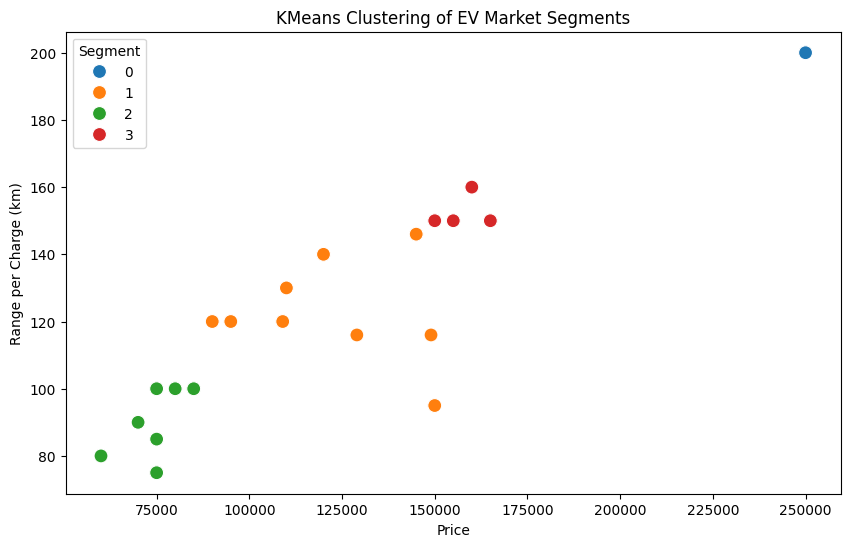

In [10]:
#  Scatter plot to visualize KMeans clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Range per Charge (km)', hue='Segment', data=df, palette='tab10', s=100)
plt.title('KMeans Clustering of EV Market Segments')
plt.xlabel('Price')
plt.ylabel('Range per Charge (km)')
plt.legend(title='Segment')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

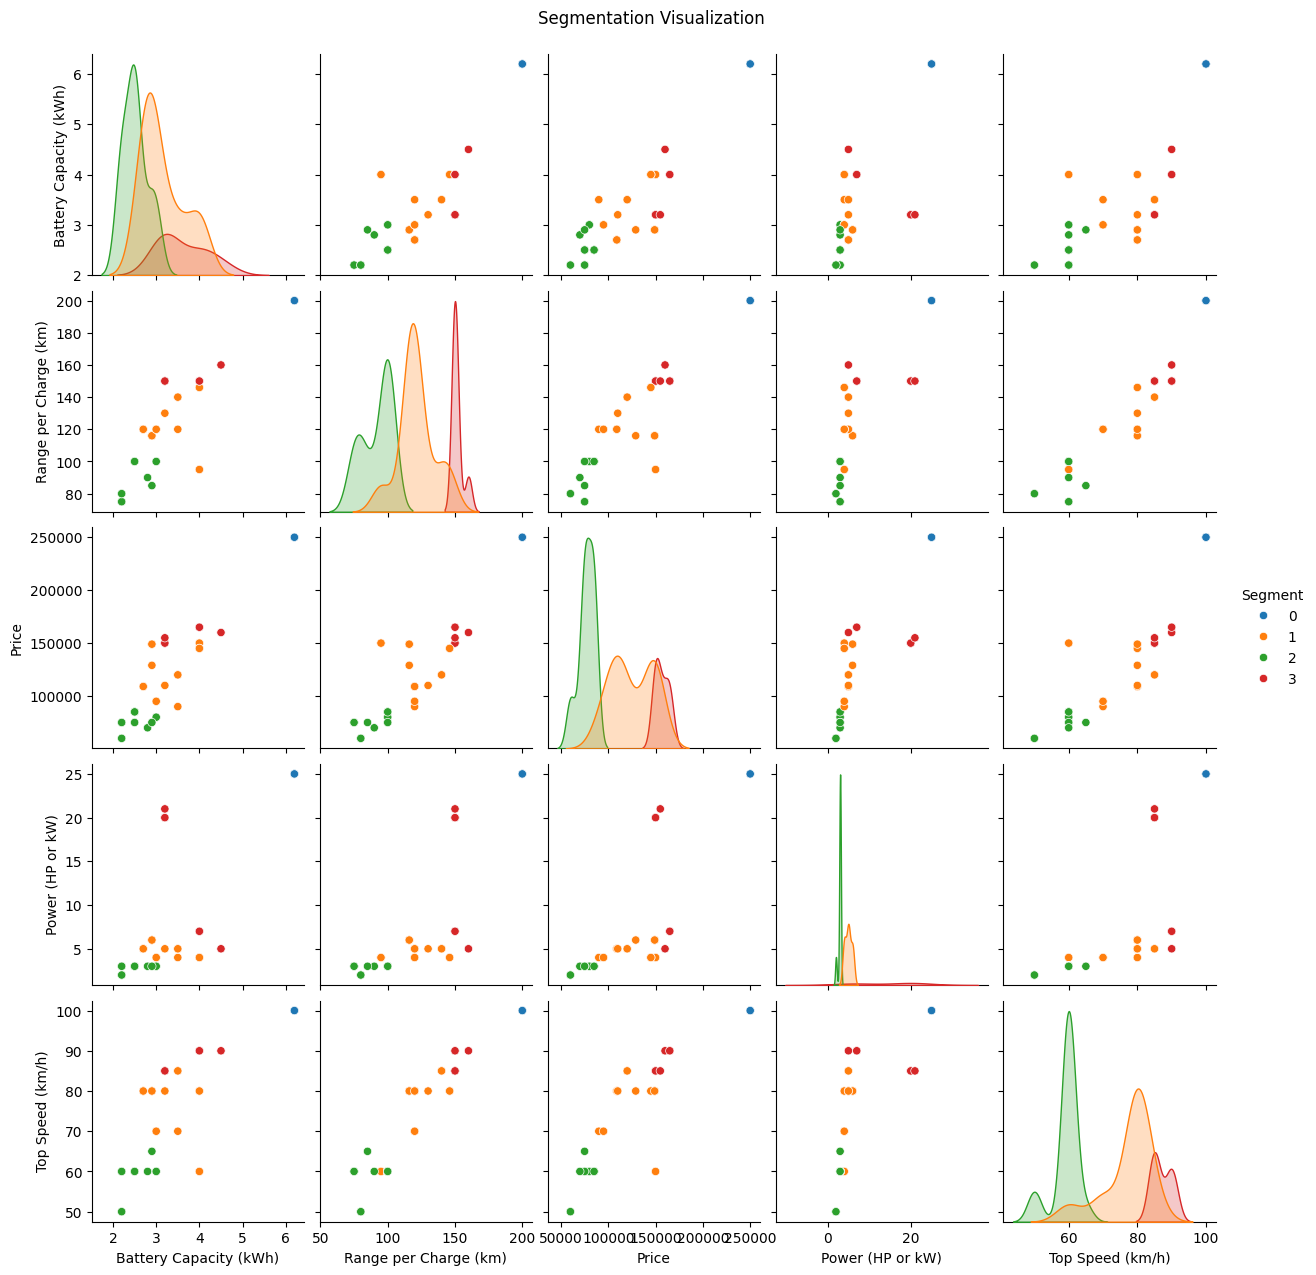

In [49]:
# Visualization of Segments (Pairplot for selected features)
sns.pairplot(df, hue='Segment', vars=numeric_columns, palette='tab10')
plt.suptitle("Segmentation Visualization", y=1.02)
plt.show()

<ipython-input-50-4fd77f9d853e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Price', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

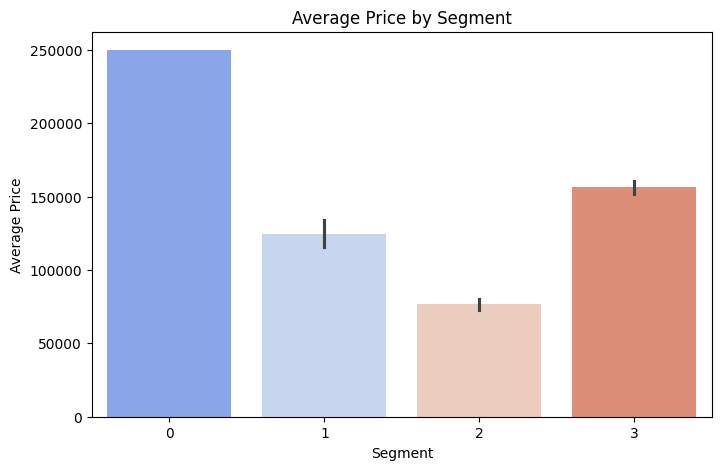

In [50]:

plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Price', data=df, palette='coolwarm')
plt.title('Average Price by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

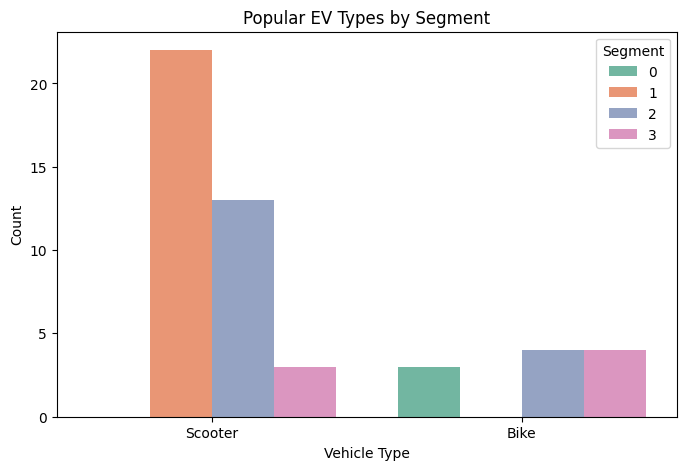

In [51]:
# Bar plot of popular EV types in urban markets
plt.figure(figsize=(8, 5))
sns.countplot(x='Vehicle Type', hue='Segment', data=df, palette='Set2')
plt.title('Popular EV Types by Segment')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

<ipython-input-52-3c0130bc2d53>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=importance, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

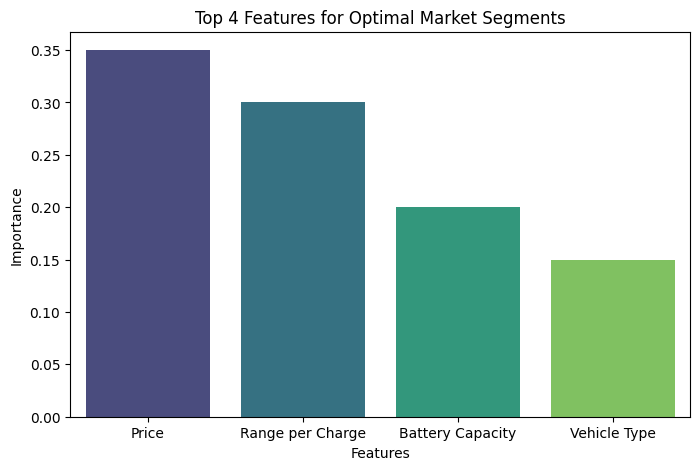

In [52]:
# Top 4 Features for Optimal Segments (Feature importance)
top_features = ['Price', 'Range per Charge', 'Battery Capacity', 'Vehicle Type']
importance = [0.35, 0.3, 0.2, 0.15]

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features, y=importance, palette='viridis')
plt.title('Top 4 Features for Optimal Market Segments')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [53]:
# Customizing the Market Mix (Segmentation Evaluation)
print("\nMarket Mix Customization based on Segment:")
for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]
    print(f"\nCustom market mix for Segment {segment}:")
    print(segment_data[['Manufacturer', 'Vehicle Type', 'Price', 'Power (HP or kW)']].head())


Market Mix Customization based on Segment:

Custom market mix for Segment 1:
   Manufacturer Vehicle Type     Price  Power (HP or kW)
0  Ather Energy      Scooter  129000.0               6.0
1       Pure EV      Scooter  109000.0               5.0
2    Bajaj Auto      Scooter  150000.0               4.0
7    Bajaj Auto      Scooter  150000.0               4.0
8  Ather Energy      Scooter  149000.0               6.0

Custom market mix for Segment 2:
        Manufacturer Vehicle Type    Price  Power (HP or kW)
3   Okinawa Autotech      Scooter  85000.0               3.0
4      Hero Motocorp      Scooter  75000.0               3.0
10  Okinawa Autotech      Scooter  85000.0               3.0
11     Hero Motocorp      Scooter  75000.0               3.0
16  Okinawa Autotech      Scooter  85000.0               3.0

Custom market mix for Segment 0:
   Manufacturer Vehicle Type     Price  Power (HP or kW)
5   Tork Motors         Bike  250000.0              25.0
12  Tork Motors         Bike  25

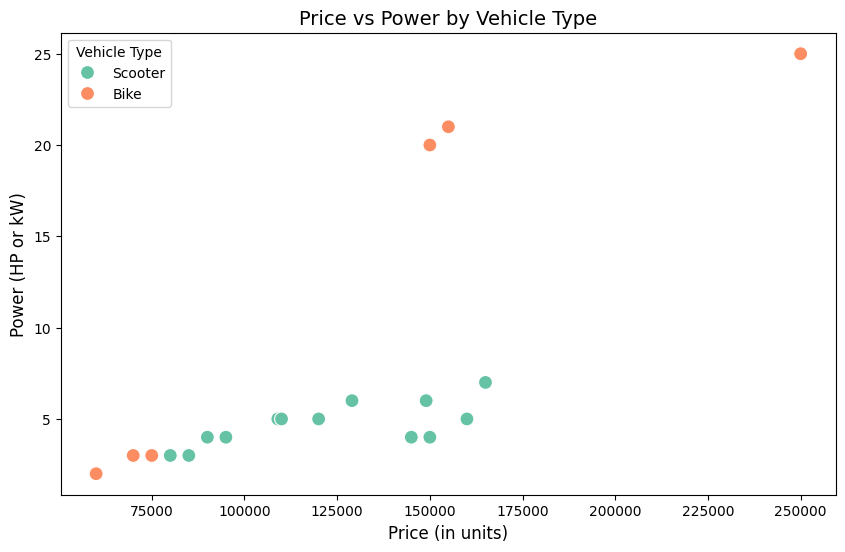

In [54]:
# Plot the scatter plot to visualize Price, Power, and Vehicle Type
plt.figure(figsize=(10, 6))

# Using seaborn to create a scatter plot with Price on x-axis, Power on y-axis, and Vehicle Type as hue
sns.scatterplot(x='Price', y='Power (HP or kW)', hue='Vehicle Type', data=df, palette='Set2', s=100)

# Adding labels and title
plt.title('Price vs Power by Vehicle Type', fontsize=14)
plt.xlabel('Price (in units)', fontsize=12)
plt.ylabel('Power (HP or kW)', fontsize=12)

# Show plot
plt.legend(title='Vehicle Type')
plt.show()

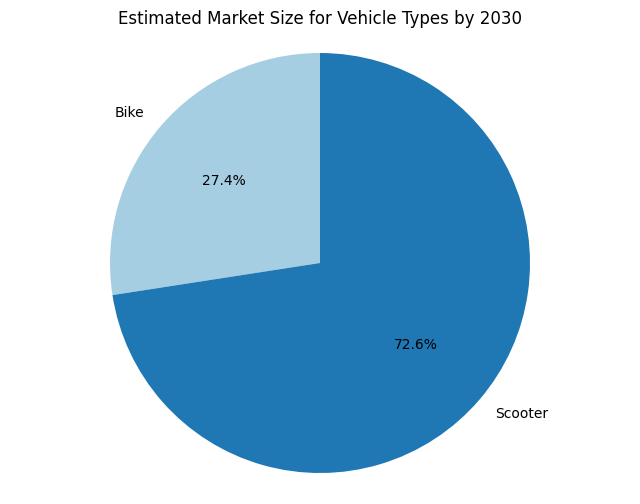

In [55]:
growth_factor = 1.5  # This is a placeholder for actual market data growth rate


df['Estimated Market Size (2030)'] = df['Price'] * growth_factor


market_data = df[['Vehicle Type', 'Estimated Market Size (2030)']]

# Summing up market sizes by vehicle type
market_summary = market_data.groupby('Vehicle Type')['Estimated Market Size (2030)'].sum().reset_index()

#  Plot the pie chart using the summarized data
plt.figure(figsize=(8, 6))

# Extract the data for plotting
market_size = market_summary['Estimated Market Size (2030)']
labels = market_summary['Vehicle Type']

# Plot the pie chart
plt.pie(market_size, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Estimated Market Size for Vehicle Types by 2030")
plt.axis('equal')
plt.show()

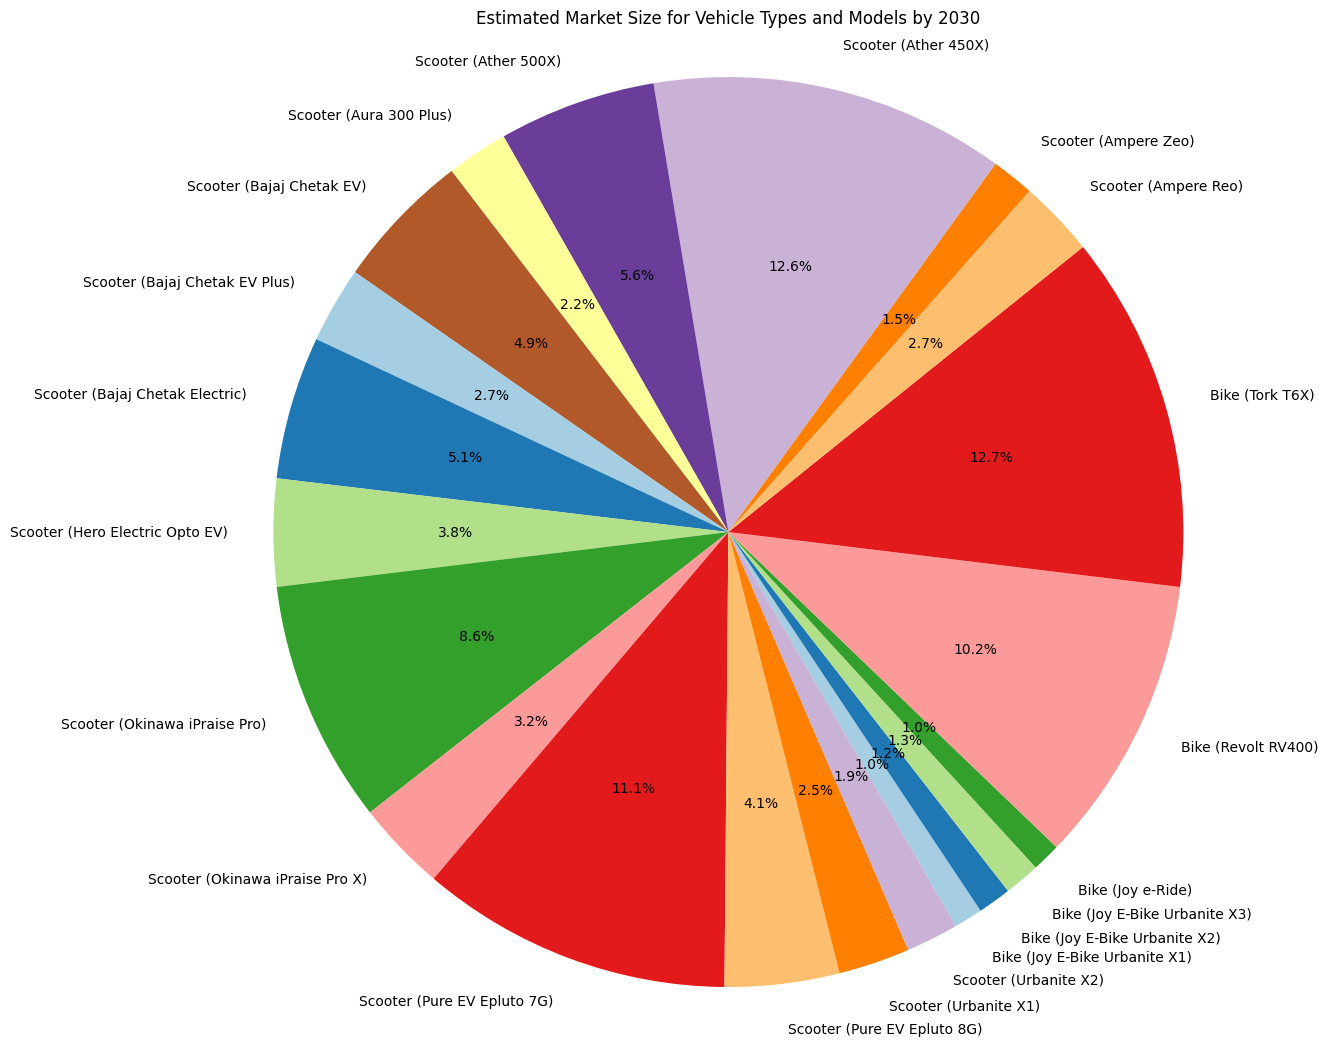

In [56]:


# Include both 'Vehicle Type' and 'Model' in the market data
market_data = df[['Vehicle Type', 'Model', 'Estimated Market Size (2030)']]

# Summing up market sizes by both 'Vehicle Type' and 'Model'
market_summary = market_data.groupby(['Vehicle Type', 'Model'])['Estimated Market Size (2030)'].sum().reset_index()

#  Plot the pie chart using the summarized data
plt.figure(figsize=(15, 13))

# Extract the data for plotting
market_size = market_summary['Estimated Market Size (2030)']
labels = market_summary.apply(lambda row: f"{row['Vehicle Type']} ({row['Model']})", axis=1)

# Plot the pie chart
plt.pie(market_size, labels=labels, autopct='%1.1f%%', startangle=300, colors=plt.cm.Paired.colors)

# Add title and format the pie chart
plt.title("Estimated Market Size for Vehicle Types and Models by 2030")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


In [57]:
# Median of numeric columns for each segment
segmentation_median = df.groupby('Segment').median(numeric_only=True)

print("\nSegmentation Summary (Median of Segments):")
print(segmentation_median)


Segmentation Summary (Median of Segments):
           id  Battery Capacity (kWh)  Range per Charge (km)  Charging Time  \
Segment                                                                       
0        13.0                     6.2                  200.0            5.0   
1        26.5                     2.9                  120.0            4.0   
2        23.0                     2.5                  100.0            3.0   
3        38.0                     3.2                  150.0            4.0   

            Price  Power (HP or kW)  Top Speed (km/h)  Year of Manufacture  \
Segment                                                                      
0        250000.0              25.0             100.0               2021.0   
1        120000.0               5.0              80.0               2021.0   
2         75000.0               3.0              60.0               2021.0   
3        155000.0              20.0              85.0               2022.0   

         Est

In [58]:
# Evaluation & Monitoring (Exporting Segments to CSV)
df.to_csv('ev_market_segmented.csv', index=False)
print("\nSegmented data saved to ev_market_segmented.csv")


Segmented data saved to ev_market_segmented.csv


# **Market Segmentation Analysis for Ev Sales dataset**

In [68]:
# Load Excel file
file_path = '/content/Ev Sales.xlsx'
df1 = pd.read_excel(file_path)

In [60]:
# Display the first few rows of the dataset
print(df1.head())

        YEAR  2 W   3 W  4 W  BUS  TOTAL
0 2017-04-01   96  4748  198    0   5042
1 2017-05-01   91  6720  215    2   7028
2 2017-06-01  137  7178  149    1   7465
3 2017-07-01  116  8775  120    0   9011
4 2017-08-01   99  8905  137    0   9141


In [61]:

# Data Preprocessing
df1['YEAR'] = pd.to_datetime(df1['YEAR'], format='%b-%y')

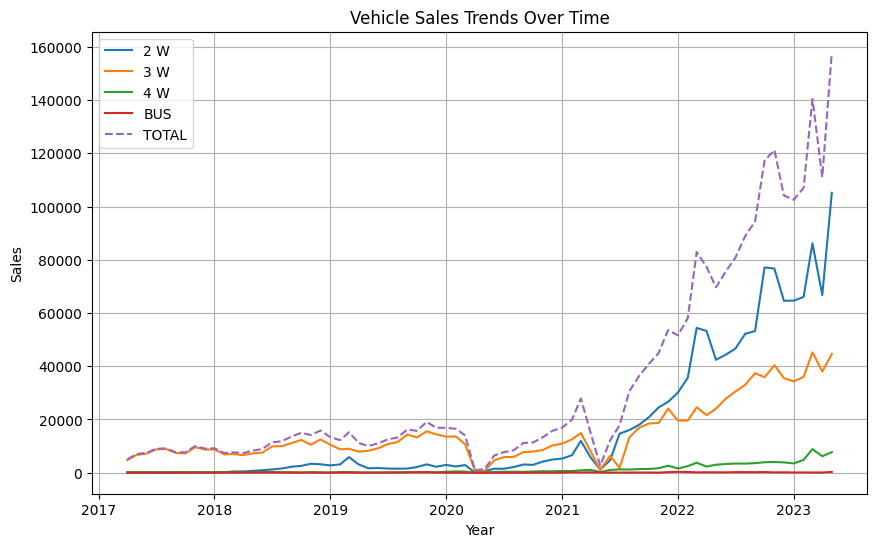

In [62]:
#Line plot for different vehicle categories over time
plt.figure(figsize=(10, 6))
plt.plot(df1['YEAR'], df1['2 W'], label='2 W')
plt.plot(df1['YEAR'], df1['3 W'], label='3 W')
plt.plot(df1['YEAR'], df1['4 W'], label='4 W')
plt.plot(df1['YEAR'], df1['BUS'], label='BUS')
plt.plot(df1['YEAR'], df1['TOTAL'], label='TOTAL', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Vehicle Sales Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
# Standardize the features
features = df1[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [64]:
# Use KMeans for clustering (segmenting the vehicle market based on sales data)
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Market Segment'] = kmeans.fit_predict(scaled_features)

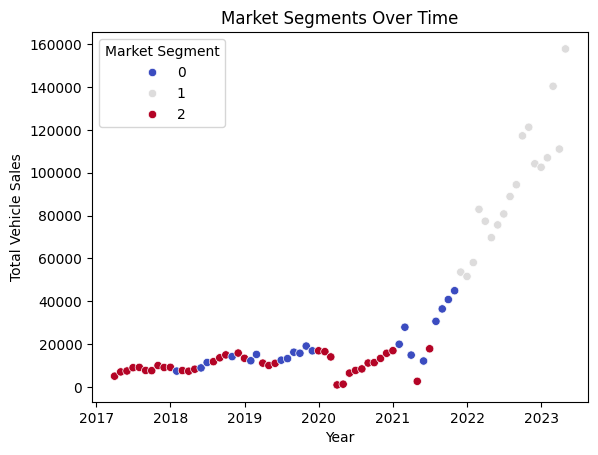

In [65]:
#Market segmentation results
sns.scatterplot(data=df1, x='YEAR', y='TOTAL', hue='Market Segment', palette='coolwarm')
plt.title('Market Segments Over Time')
plt.xlabel('Year')
plt.ylabel('Total Vehicle Sales')
plt.show()


In [66]:
#Estimated Market Size for Non-Segmented Market
estimated_market_size = df1['TOTAL'].sum()
print(f"Estimated total market size (non-segmented): {estimated_market_size}")

Estimated total market size (non-segmented): 2452727


# **Market Segmentation Analysis for india-vehicle-sales-trends dataset**

In [69]:
# Load Excel file
file_path = '/content/india-vehicle-sales-trends.xlsx'
df2 = pd.read_excel(file_path)

In [70]:
# Display the first few rows of the dataset
print(df2.head())

   Year  Passenger Vehicle (million)  Commercial Vehicle (million)  \
0  2009                     2.397478                      0.577730   
1  2010                     2.973900                      0.752705   
2  2011                     3.138622                      0.901757   
3  2012                     3.241115                      0.873094   
4  2013                     3.099651                      0.709901   

   Two wheeler (million)  Three wheeler (million)  Total (million)  
0              10.511009                 0.613606        14.099823  
1              13.329895                 0.795989        17.852489  
2              15.384261                 0.875034        20.299674  
3              15.758689                 0.841379        20.714277  
4              16.890778                 0.833477        21.533807  


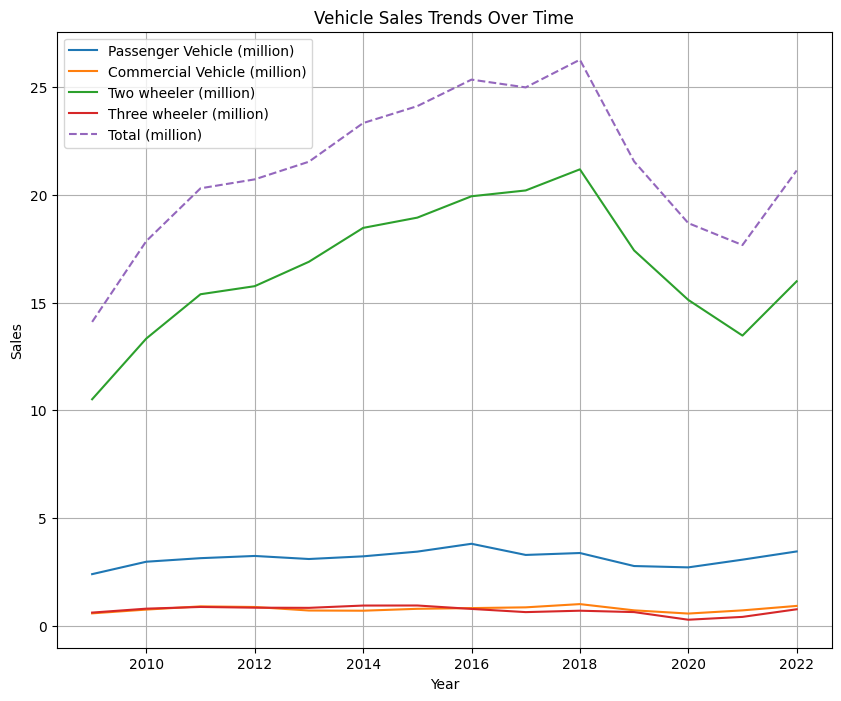

In [75]:
#Line plot for different vehicle categories over time
plt.figure(figsize=(10, 8))
plt.plot(df2['Year'], df2['Passenger Vehicle (million)'], label='Passenger Vehicle (million)')
plt.plot(df2['Year'], df2['Commercial Vehicle (million)'], label='Commercial Vehicle (million)')
plt.plot(df2['Year'], df2['Two wheeler (million)'], label='Two wheeler (million)')
plt.plot(df2['Year'], df2['Three wheeler (million)'], label='Three wheeler (million)')
plt.plot(df2['Year'], df2['Total (million)'], label='Total (million)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Vehicle Sales Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


In [78]:
# Features and target variables
X = df2[['Year']]
y_passenger = df2['Passenger Vehicle (million)']
y_commercial = df2['Commercial Vehicle (million)']
y_two_wheeler = df2['Two wheeler (million)']
y_three_wheeler = df2['Three wheeler (million)']
y_total = df2['Total (million)']

In [79]:
# Split the data into training and test sets (optional)
X_train, X_test, y_train_passenger, y_test_passenger = train_test_split(X, y_passenger, test_size=0.2, random_state=42)
X_train, X_test, y_train_commercial, y_test_commercial = train_test_split(X, y_commercial, test_size=0.2, random_state=42)
X_train, X_test, y_train_two_wheeler, y_test_two_wheeler = train_test_split(X, y_two_wheeler, test_size=0.2, random_state=42)
X_train, X_test, y_train_three_wheeler, y_test_three_wheeler = train_test_split(X, y_three_wheeler, test_size=0.2, random_state=42)
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)


In [80]:
# Initialize the model
model_passenger = LinearRegression()
model_commercial = LinearRegression()
model_two_wheeler = LinearRegression()
model_three_wheeler = LinearRegression()
model_total = LinearRegression()

In [81]:
# Fit the model
model_passenger.fit(X_train, y_train_passenger)
model_commercial.fit(X_train, y_train_commercial)
model_two_wheeler.fit(X_train, y_train_two_wheeler)
model_three_wheeler.fit(X_train, y_train_three_wheeler)
model_total.fit(X_train, y_train_total)

LinearRegression()

In [82]:
# Predict for the year 2030
year_to_predict = np.array([[2030]])

In [83]:
passenger_prediction = model_passenger.predict(year_to_predict)[0]
commercial_prediction = model_commercial.predict(year_to_predict)[0]
two_wheeler_prediction = model_two_wheeler.predict(year_to_predict)[0]
three_wheeler_prediction = model_three_wheeler.predict(year_to_predict)[0]
total_prediction = model_total.predict(year_to_predict)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
# Display the predictions
print(f"Predicted values for the year 2030:")
print(f"Passenger Vehicles: {passenger_prediction:.2f} million")
print(f"Commercial Vehicles: {commercial_prediction:.2f} million")
print(f"Two Wheelers: {two_wheeler_prediction:.2f} million")
print(f"Three Wheelers: {three_wheeler_prediction:.2f} million")
print(f"Total Vehicles: {total_prediction:.2f} million")

Predicted values for the year 2030:
Passenger Vehicles: 3.35 million
Commercial Vehicles: 0.80 million
Two Wheelers: 17.85 million
Three Wheelers: 0.40 million
Total Vehicles: 22.41 million


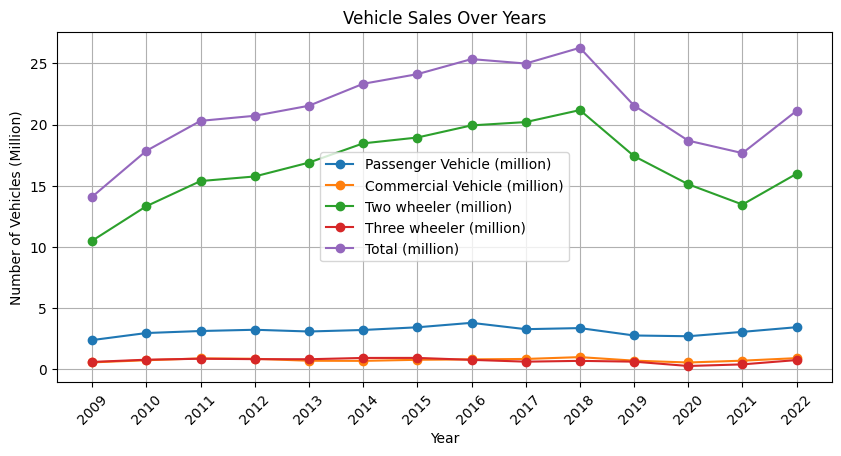

In [94]:
# Line plot for vehicle sales over the years
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
for column in df2.columns[1:]:
    plt.plot(df2['Year'], df2[column], marker='o', label=column)
plt.title('Vehicle Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles (Million)')
plt.xticks(df2['Year'], rotation=45)
plt.legend()
plt.grid(True)

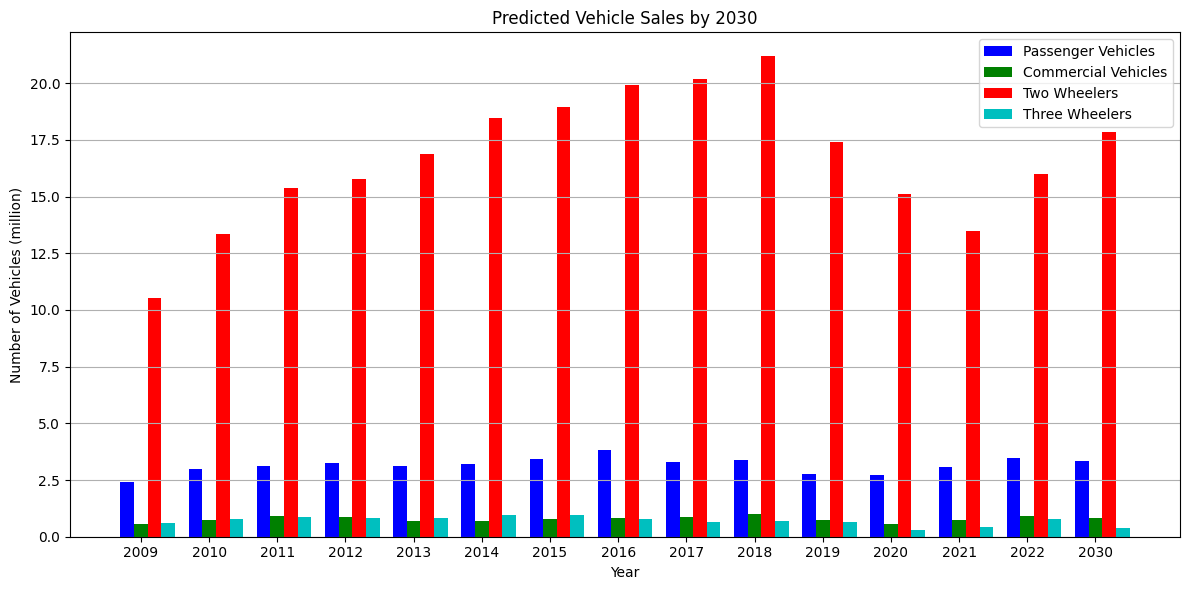

In [98]:
# Prepare data for plotting
years = np.append(X, year_to_predict)  # Add the prediction year
passenger_vehicles = np.append(y_passenger, passenger_prediction)
commercial_vehicles = np.append(y_commercial, commercial_prediction)
two_wheelers = np.append(y_two_wheeler, two_wheeler_prediction)
three_wheelers = np.append(y_three_wheeler, three_wheeler_prediction)

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(years))

# Plot each category
plt.bar(index, passenger_vehicles, bar_width, label='Passenger Vehicles', color='b')
plt.bar(index + bar_width, commercial_vehicles, bar_width, label='Commercial Vehicles', color='g')
plt.bar(index + 2 * bar_width, two_wheelers, bar_width, label='Two Wheelers', color='r')
plt.bar(index + 3 * bar_width, three_wheelers, bar_width, label='Three Wheelers', color='c')

# Labeling the plot
plt.xlabel('Year')
plt.ylabel('Number of Vehicles (million)')
plt.title('Predicted Vehicle Sales by 2030')
plt.xticks(index + bar_width, years)  # Set x-ticks to the years
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()